<h1>IME672 Group Project<h1>
<h3>problem description: predict price for flight tickets using data of Air Tickets Between Shanghai and Beijing<h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import researchpy
df = pd.read_csv("pek-sha.csv")
df.head(10)

,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
0,14393,HO1252,320,PEK,NaN,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,2019-01-03 14:26:15,1
1,14409,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,2019-01-03 14:26:15,1
2,14415,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,2019-01-03 14:26:15,1
3,14429,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,2019-01-03 14:26:15,1
4,14431,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,2019-01-03 14:26:15,1
5,14433,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,C,5660,1.00,2019-01-03 14:26:15,1
6,14445,CA1831,773,PEK,NaN,SHA,2019-01-04 07:30:00,2019-01-04 09:35:00,C,R,1860,0.34,2019-01-03 14:26:15,1
7,14451,CA1831,773,PEK,NaN,SHA,2019-01-04 07:30:00,2019-01-04 09:35:00,C,J,5530,1.00,2019-01-03 14:26:15,1
8,14488,MU5102,333,PEK,NaN,SHA,2019-01-04 08:00:00,2019-01-04 10:15:00,C,I,1800,0.34,2019-01-03 14:26:15,1
9,14491,MU5102,333,PEK,NaN,SHA,2019-01-04 08:00:00,2019-01-04 10:15:00,C,J,5360,1.00,2019-01-03 14:26:15,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300336 entries, 0 to 300335
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              300336 non-null  int64  
 1   flightNumber    300336 non-null  object 
 2   craftTypeCode   300336 non-null  object 
 3   depAirport      300336 non-null  object 
 4   traAirport      5749 non-null    object 
 5   arrAirport      300336 non-null  object 
 6   departureDate   300336 non-null  object 
 7   arrivalDate     300336 non-null  object 
 8   cabinClass      300336 non-null  object 
 9   priceClass      300336 non-null  object 
 10  price           300336 non-null  int64  
 11  rate            300336 non-null  float64
 12  createDate      300336 non-null  object 
 13  dateDifference  300336 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 32.1+ MB


In [3]:
# data of flights between beijing to shanghai 
# traAirport      5749 non-null    object ....|||5749 values???
# float64(1), int64(3), object(10) lotta categorical data. drop id,
# rate - discount rate
# cabinClass: Y = Econ Class, C = Business Class , F = First Class
# flightnumber - every other flight should be unique.
# craftTypeCode - ICAO aircraft type designators.
# depAirport, arrAirport - arrival & departure airport.
# traAirport - an airport where an aircraft has made a stopover, which was not specified in the Electronic ticket. if other than layover exists, then planes might have been changed.
# dunno what createdate means but,
# in a random sample diff between createdate &  departureDate = 2019-03-30 06:35:00 - 2019-02-28 11:35:19 = 30, which is dateDifference. so, inferring that createDate is the day of booking the flight.
df.describe()

,ID,price,rate,dateDifference
count,3.003360e+05,300336.000000,300336.000000,300336.000000
mean,3.785370e+07,2209.684696,0.764667,6.682762
std,2.320571e+07,1755.003424,0.251366,7.501340
min,1.438400e+04,235.000000,0.000000,1.000000
25%,1.770736e+07,1005.000000,0.530000,2.000000
50%,3.718240e+07,1490.000000,0.860000,5.000000
75%,5.705183e+07,2980.000000,1.000000,7.000000
max,8.016500e+07,6410.000000,1.000000,30.000000


In [4]:
df.traAirport = df.traAirport.fillna('None')
df['traAirport'].nunique()

2

<AxesSubplot:xlabel='traAirport', ylabel='count'>

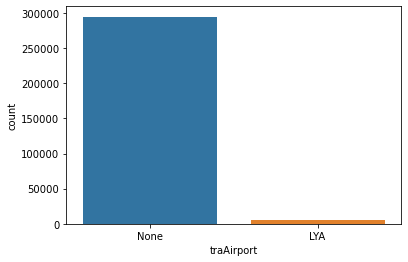

In [5]:
import seaborn as sns
sns.countplot(data=df,x="traAirport")

In [6]:
##there are only 2 values, either the flight didnt stop for a layover, or stoped at LYA(luoyang)
df["flightNumber"].nunique()

51

In [7]:
#51 unique values...hmmm.

In [8]:

df["craftTypeCode"].value_counts()

33L    59178
359    36896
333    31163
773    28022
325    16107
738    14067
321    11627
33A     9174
789     7915
747     7665
32L     7618
73E     7546
73L     7375
73K     6023
32A     5422
77W     5061
330     3995
350     3707
323     3405
338     3001
78A     2850
331     2806
33E     2796
744     2459
33G     2192
33H     1643
337     1613
320     1267
787     1144
78B     1106
332      925
73N      838
351      831
33W      613
336      473
319      381
73T      361
32M      350
33C      261
73B      251
73H      158
33B       42
73U        7
73G        2
Name: craftTypeCode, dtype: int64

In [9]:
df["craftTypeCode"].nunique()

44

<AxesSubplot:xlabel='price'>

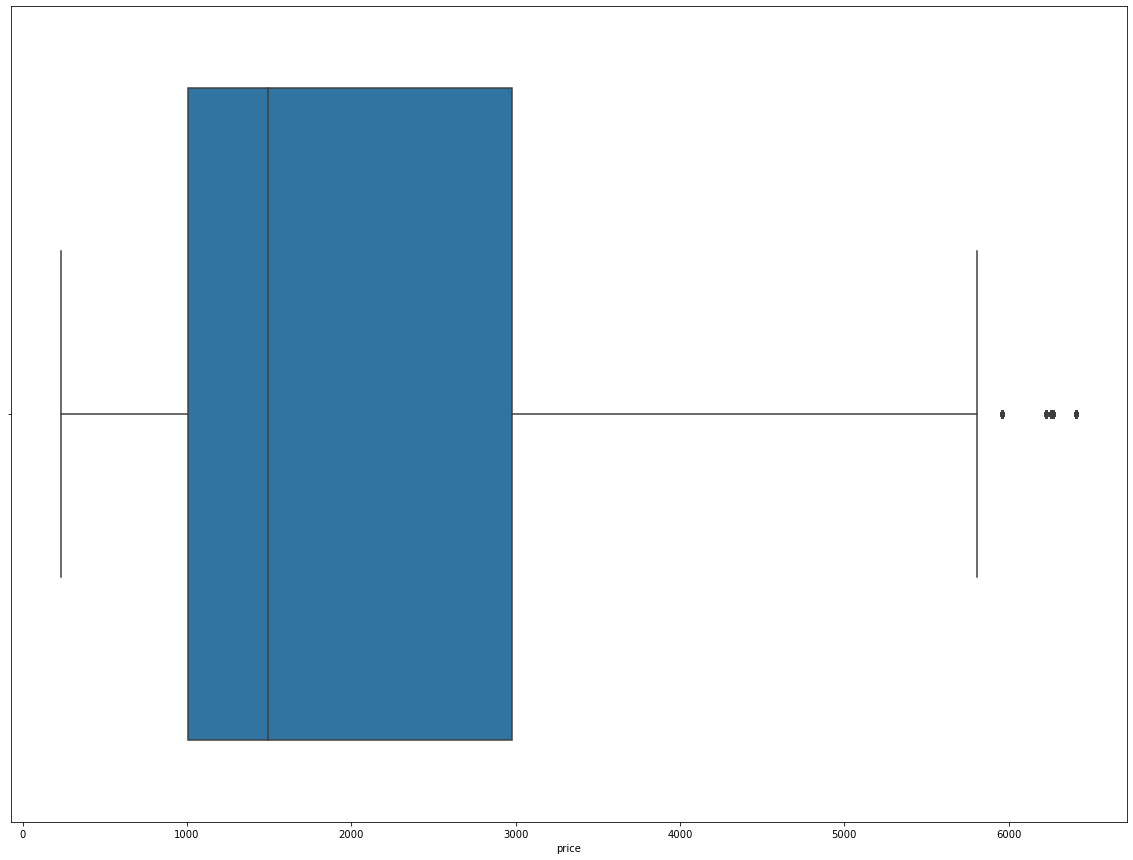

In [10]:
#checking for outliers in the data
fig, ax = plt.subplots(figsize=(20, 15))
sns.boxplot(data=df,x='price')

In [11]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
IQR = q3 - q1
filter = (df['price'] >= q1 - 1.5 * IQR) & (df['price'] <= q3 + 1.5 *IQR)
df = df.loc[filter]
df.shape
print("Number of Outliers : 2205")

Number of Outliers : 2205


In [12]:
df[['arrivalDate','departureDate','createDate']] = df[['arrivalDate','departureDate','createDate']].apply(pd.to_datetime)
# departureDate should always be after createDate
df[df.departureDate < df.createDate].count()
#Hence no problem in this case

ID                0
flightNumber      0
craftTypeCode     0
depAirport        0
traAirport        0
arrAirport        0
departureDate     0
arrivalDate       0
cabinClass        0
priceClass        0
price             0
rate              0
createDate        0
dateDifference    0
dtype: int64

In [13]:
# arrivalDate should always be after departureDate
df[df.departureDate > df.arrivalDate].count()
#Hence no problem in this case

ID                0
flightNumber      0
craftTypeCode     0
depAirport        0
traAirport        0
arrAirport        0
departureDate     0
arrivalDate       0
cabinClass        0
priceClass        0
price             0
rate              0
createDate        0
dateDifference    0
dtype: int64

In [14]:
#checking for anamolies in depAirport & arrAirport, both shoould have only one value.
print(df["depAirport"].nunique(),df["arrAirport"].nunique())

1 1


In [15]:
#so drop depAirport arrAirport id traAirport since they are pretty much useless
#can also drop createDate since dateDifference also serves same purpose

In [16]:
df.drop(['ID','depAirport','arrAirport','createDate'], axis = 1, inplace=True)
df.head(10)

,flightNumber,craftTypeCode,traAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,dateDifference
0,HO1252,320,None,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,1
1,MU5138,33L,None,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,1
2,MU5138,33L,None,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,1
3,HU7605,350,None,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,1
4,HU7605,350,None,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,1
5,HU7605,350,None,2019-01-04 07:20:00,2019-01-04 09:35:00,C,C,5660,1.00,1
6,CA1831,773,None,2019-01-04 07:30:00,2019-01-04 09:35:00,C,R,1860,0.34,1
7,CA1831,773,None,2019-01-04 07:30:00,2019-01-04 09:35:00,C,J,5530,1.00,1
8,MU5102,333,None,2019-01-04 08:00:00,2019-01-04 10:15:00,C,I,1800,0.34,1
9,MU5102,333,None,2019-01-04 08:00:00,2019-01-04 10:15:00,C,J,5360,1.00,1


In [17]:
# can add an extra column for difference between departureDate & arrivalDate, that way we wont have to keep these 2 columns.
# as they are, it will tough for our model to infer from the datetime values
# or we could convert them to sin & cosine values of date & day(cyclic encoding),
# or we could simply extract the day of the flight, since flights on weekdays may be cheaper than weekends.

In [18]:
#df[['arrivalDate','departureDate',]] = df[['arrivalDate','departureDate',]].apply(pd.to_datetime)
df['daysaway'] = (df['arrivalDate'] - df['departureDate']).dt.days

In [19]:
df['depDay']=df['departureDate'].dt.day_name()
df['arrDay']=df['arrivalDate'].dt.day_name()

In [20]:
df.head()

,flightNumber,craftTypeCode,traAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,dateDifference,daysaway,depDay,arrDay
0,HO1252,320,None,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,1,0,Friday,Friday
1,MU5138,33L,None,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,1,0,Friday,Friday
2,MU5138,33L,None,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,1,0,Friday,Friday
3,HU7605,350,None,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,1,0,Friday,Friday
4,HU7605,350,None,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,1,0,Friday,Friday


In [21]:
print(df['daysaway'].nunique(),df["depDay"].nunique(),df["arrDay"].nunique())

1 7 7


In [22]:
#so, these are all one day trips, so counting days wont work. lets count seconds
df['daysaway'] = (df['arrivalDate'] - df['departureDate']).dt.seconds

In [23]:
df.head()

,flightNumber,craftTypeCode,traAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,dateDifference,daysaway,depDay,arrDay
0,HO1252,320,None,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,1,8400,Friday,Friday
1,MU5138,33L,None,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,1,8100,Friday,Friday
2,MU5138,33L,None,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,1,8100,Friday,Friday
3,HU7605,350,None,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,1,8100,Friday,Friday
4,HU7605,350,None,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,1,8100,Friday,Friday


In [24]:
#alright works

In [25]:
df.drop(['arrivalDate'], axis = 1, inplace=True)
df.head(10)

,flightNumber,craftTypeCode,traAirport,departureDate,cabinClass,priceClass,price,rate,dateDifference,daysaway,depDay,arrDay
0,HO1252,320,None,2019-01-04 06:35:00,C,C,1860,1.00,1,8400,Friday,Friday
1,MU5138,33L,None,2019-01-04 07:00:00,C,I,1640,0.31,1,8100,Friday,Friday
2,MU5138,33L,None,2019-01-04 07:00:00,C,J,5360,1.00,1,8100,Friday,Friday
3,HU7605,350,None,2019-01-04 07:20:00,C,I,1635,0.29,1,8100,Friday,Friday
4,HU7605,350,None,2019-01-04 07:20:00,C,I,1640,0.29,1,8100,Friday,Friday
5,HU7605,350,None,2019-01-04 07:20:00,C,C,5660,1.00,1,8100,Friday,Friday
6,CA1831,773,None,2019-01-04 07:30:00,C,R,1860,0.34,1,7500,Friday,Friday
7,CA1831,773,None,2019-01-04 07:30:00,C,J,5530,1.00,1,7500,Friday,Friday
8,MU5102,333,None,2019-01-04 08:00:00,C,I,1800,0.34,1,8100,Friday,Friday
9,MU5102,333,None,2019-01-04 08:00:00,C,J,5360,1.00,1,8100,Friday,Friday


<AxesSubplot:ylabel='Density'>

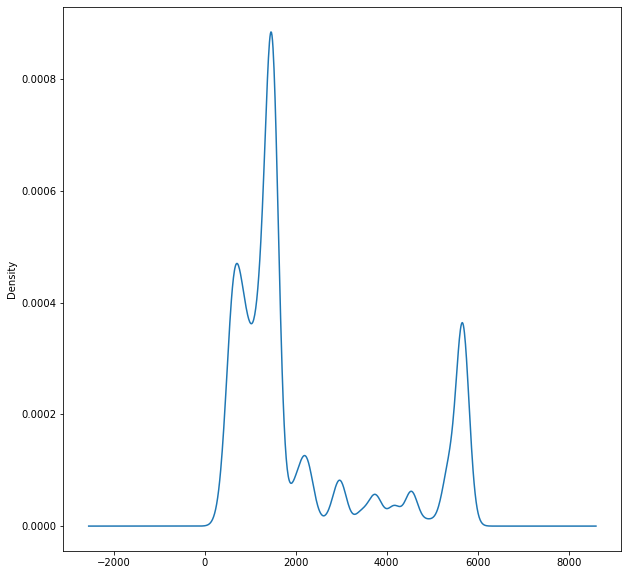

In [26]:
df["price"].plot(kind = "density" , figsize = (10,10))

<AxesSubplot:ylabel='Frequency'>

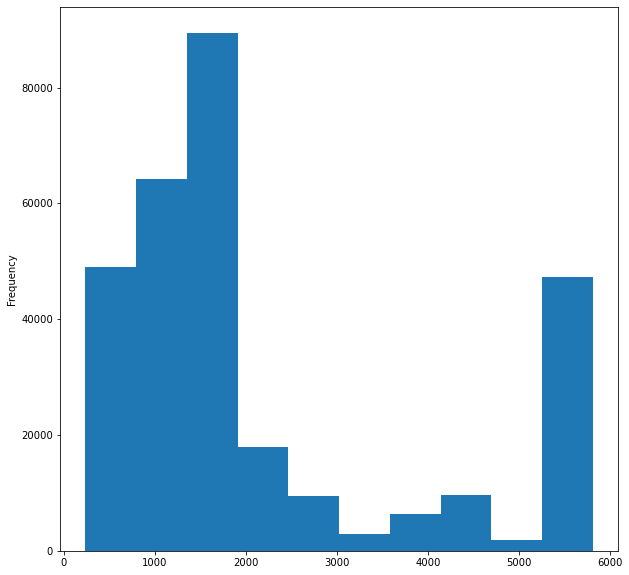

In [27]:
df["price"].plot(kind = "hist" , figsize = (10,10))

<AxesSubplot:xlabel='traAirport', ylabel='count'>

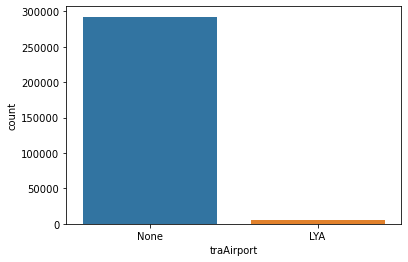

In [28]:
sns.countplot(data=df,x="traAirport")

In [29]:
df["traAirport"].value_counts() #quite unbalanced

None    292382
LYA       5749
Name: traAirport, dtype: int64

In [30]:
df[df.traAirport == "LYA"].flightNumber.value_counts()
# Only 2 flights have a transit Airport


MU5693    3650
MU5390    2099
Name: flightNumber, dtype: int64

<AxesSubplot:xlabel='cabinClass', ylabel='count'>

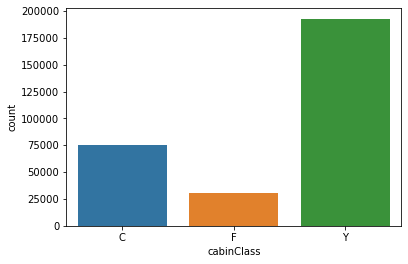

In [31]:
sns.countplot(data=df,x="cabinClass")

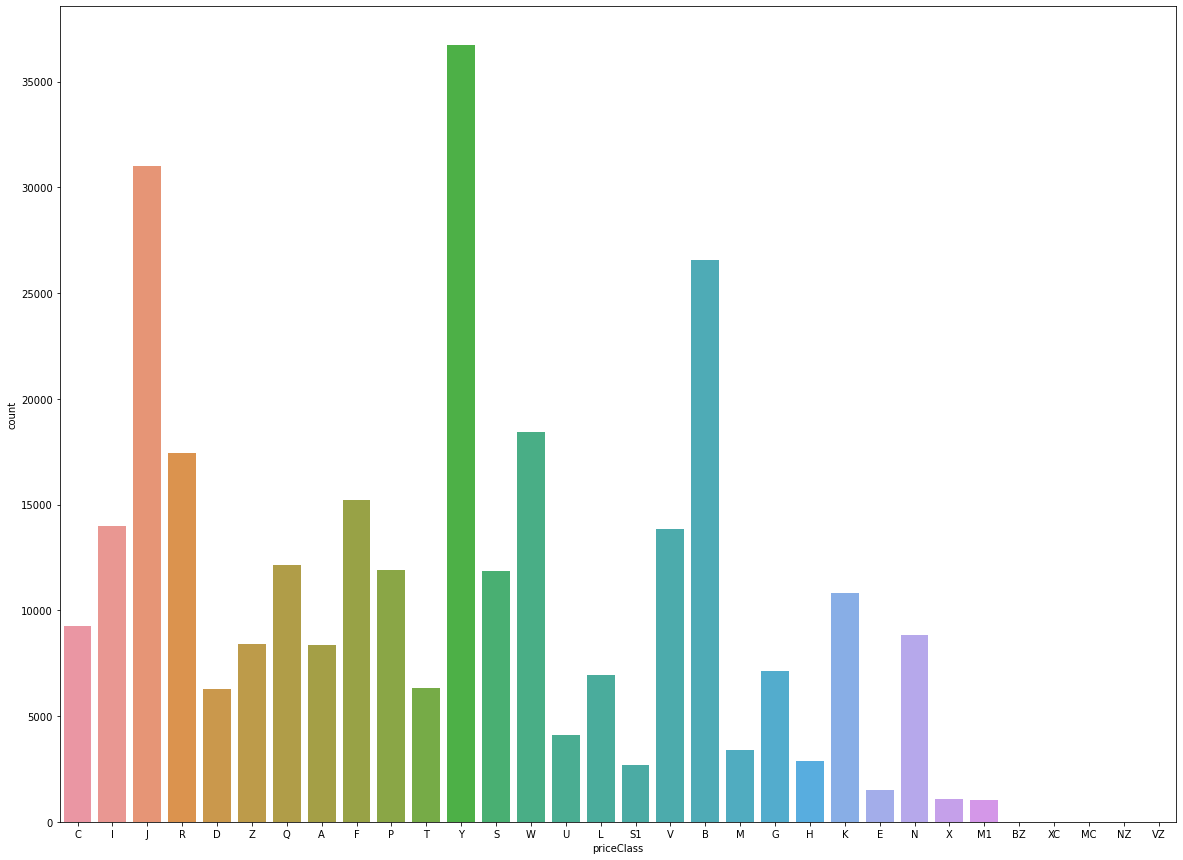

In [32]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.countplot(data=df,x="priceClass")
plt.show()

In [33]:
# are BZ, XC, MC, NZ, VZ empty ?
print(df['priceClass'].value_counts()['BZ'],df['priceClass'].value_counts()['XC'],df['priceClass'].value_counts()['MC'],df['priceClass'].value_counts()['NZ'],df['priceClass'].value_counts()['VZ'])

2 3 4 1 3


<AxesSubplot:xlabel='craftTypeCode', ylabel='count'>

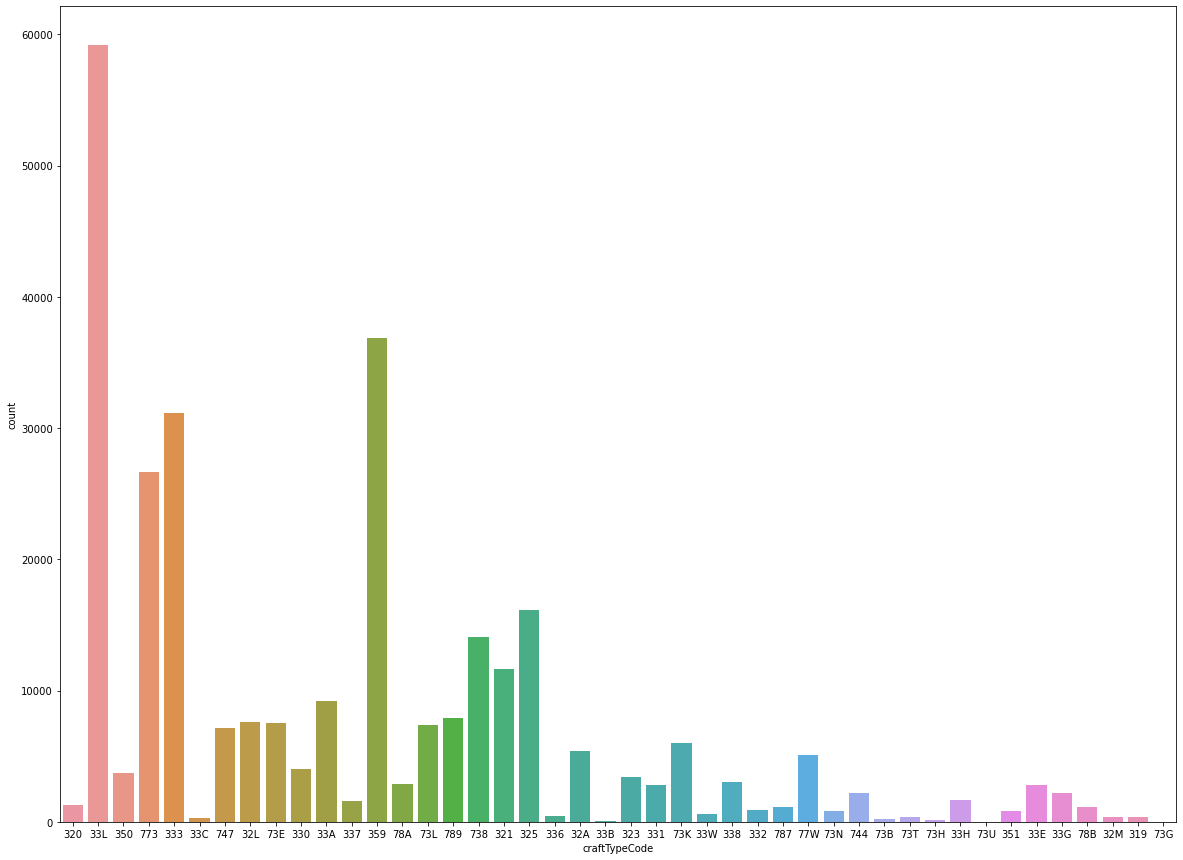

In [34]:
#NO, they are very less in number.
fig, ax = plt.subplots(figsize=(20, 15))
sns.countplot(data=df,x='craftTypeCode')

<AxesSubplot:xlabel='flightNumber', ylabel='count'>

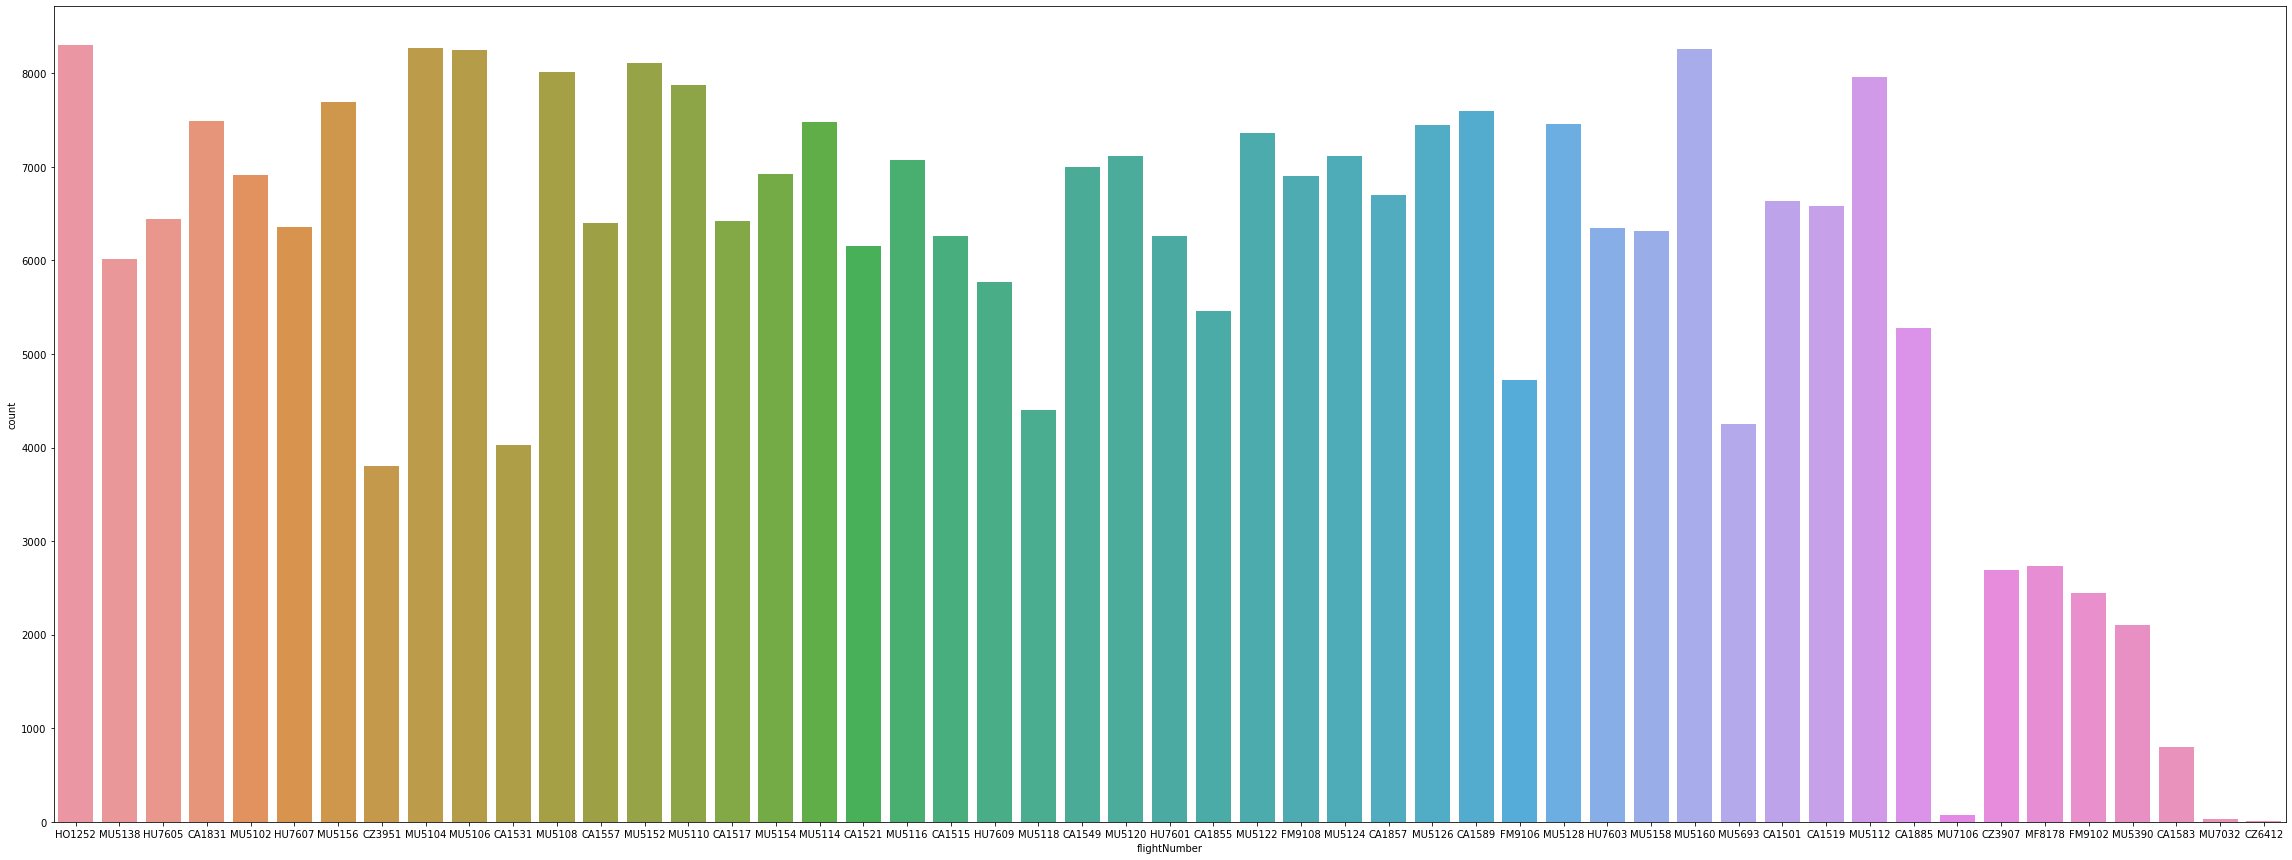

In [35]:
#33L is the most occuring aircraft code
fig, ax = plt.subplots(figsize=(40, 15))
sns.countplot(data=df,x='flightNumber')

In [36]:
df.corr()

,price,rate,dateDifference,daysaway
price,1.000000,0.430178,-0.052950,-0.057445
rate,0.430178,1.000000,-0.021908,-0.060896
dateDifference,-0.052950,-0.021908,1.000000,0.007318
daysaway,-0.057445,-0.060896,0.007318,1.000000


In [37]:
df.corr().style.background_gradient(cmap='coolwarm')

,price,rate,dateDifference,daysaway
price,1.000000,0.430178,-0.052950,-0.057445
rate,0.430178,1.000000,-0.021908,-0.060896
dateDifference,-0.052950,-0.021908,1.000000,0.007318
daysaway,-0.057445,-0.060896,0.007318,1.000000


In [38]:
#pretty bad, im still confused as to what rate & price means? is ||price=original_ticket_value*rate|| or ||original_ticket_value = price * rate||

<AxesSubplot:xlabel='Cabin Class', ylabel='Mean Price'>

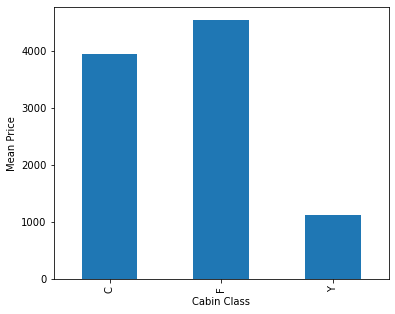

In [39]:
dfg = df.groupby("cabinClass").price.mean()
dfg.plot(kind='bar', ylabel='Mean Price',
         xlabel='Cabin Class', figsize=(6, 5))

<AxesSubplot:xlabel='Price Class', ylabel='Mean Price'>

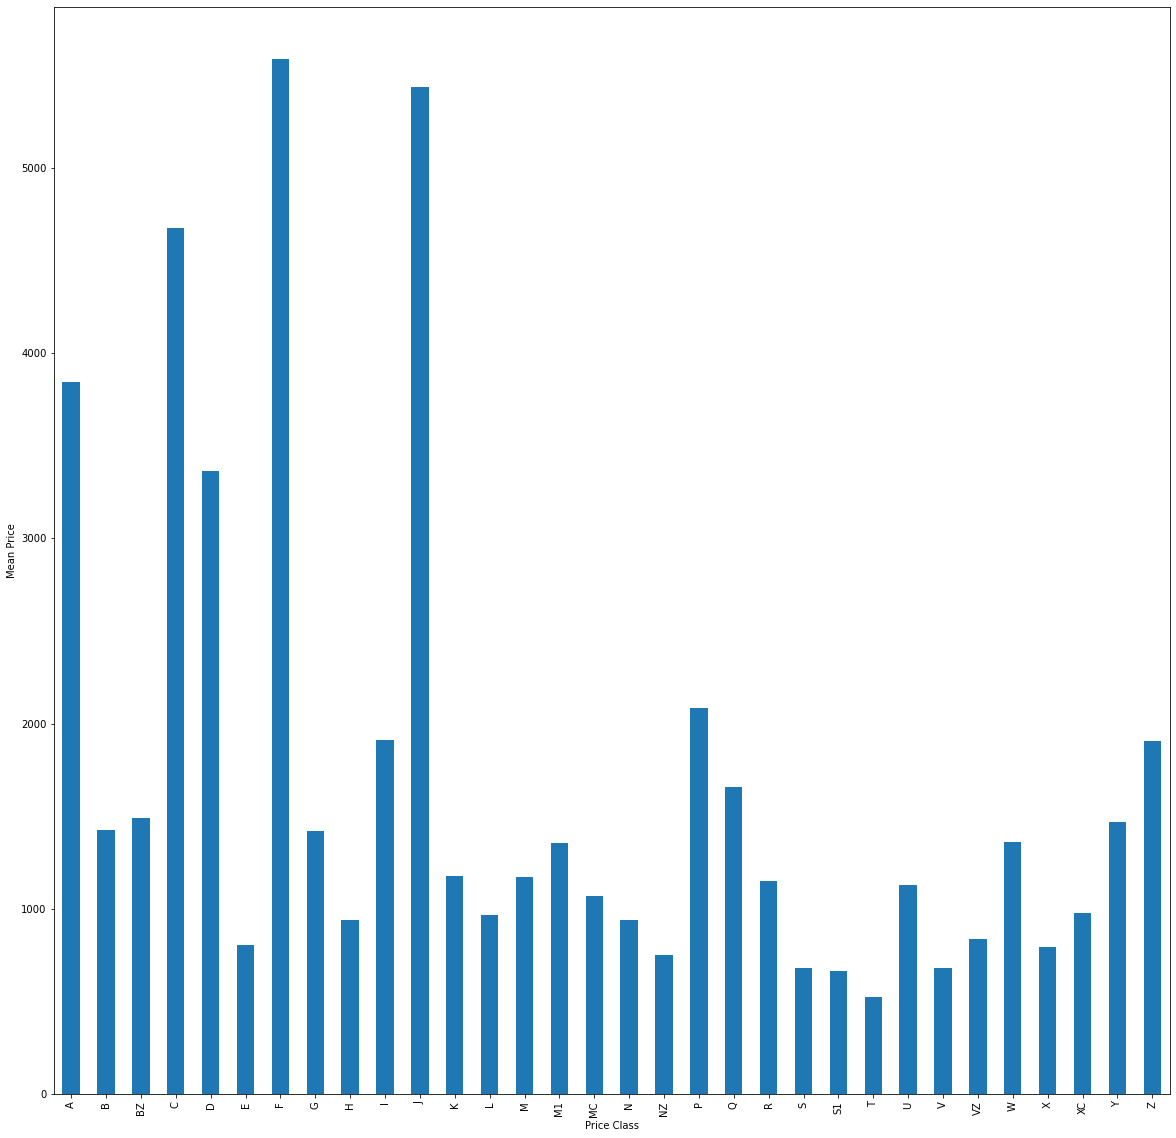

In [40]:
dfg = df.groupby("priceClass").price.mean()
dfg.plot(kind='bar', ylabel='Mean Price',
         xlabel='Price Class', figsize=(20, 20))

<AxesSubplot:xlabel='Craft Type', ylabel='Mean Price'>

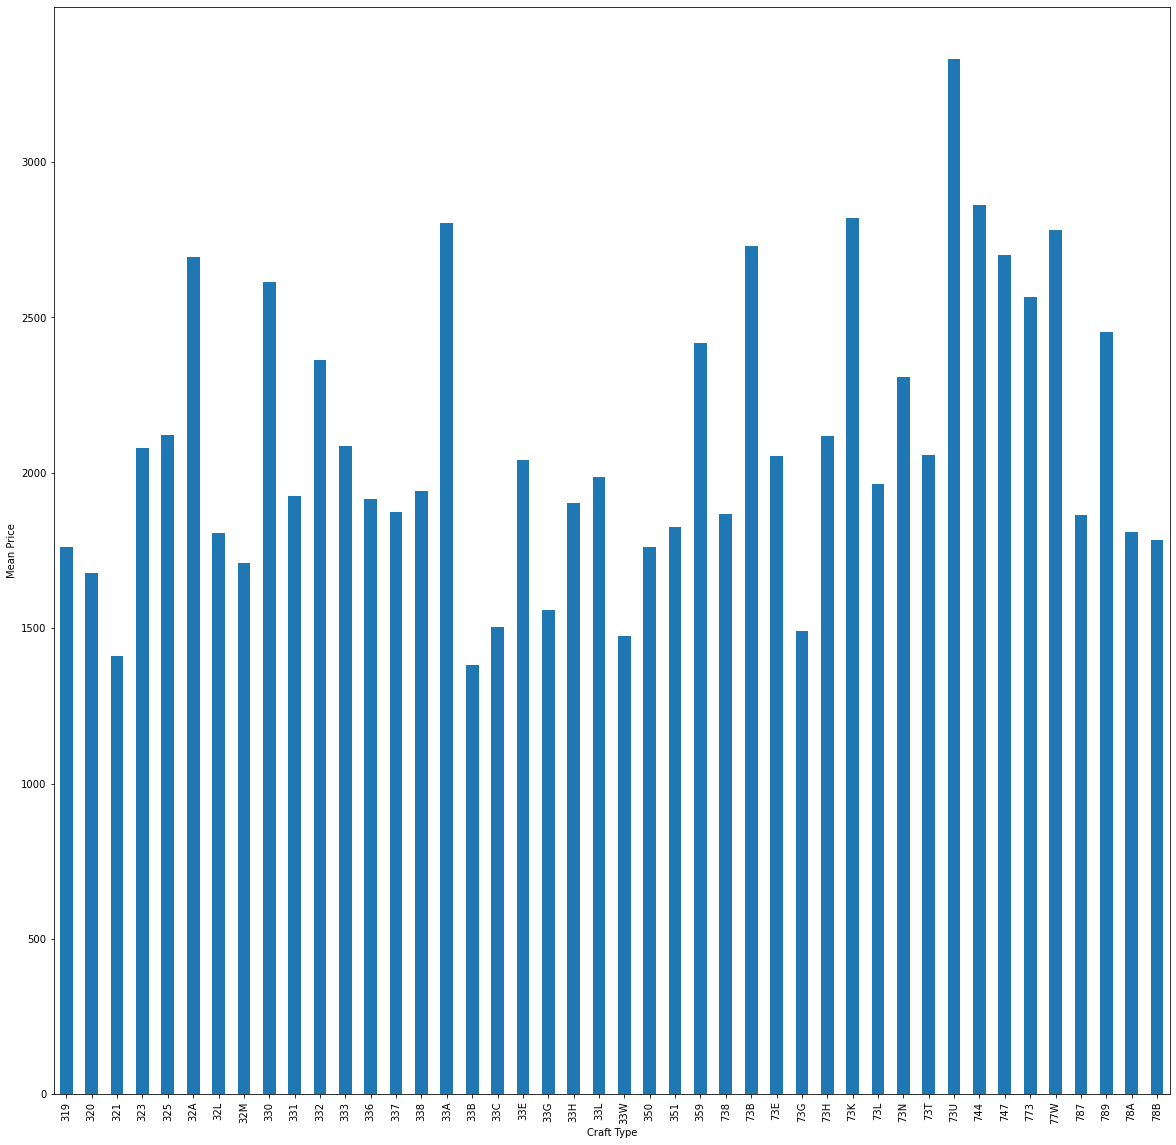

In [41]:
dfg = df.groupby("craftTypeCode").price.mean()
dfg.plot(kind='bar', ylabel='Mean Price',
         xlabel='Craft Type', figsize=(20, 20))